<a href="https://colab.research.google.com/github/KringeKrimson/Pytorch-Basics/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3211 Assignment1:

### Contact TA:
Shuling Zhao: szhaoax@cse.ust.hk
Xunguang Wang: xwanghm@cse.ust.hk

You need to install the matplotlib package in advance, try this command:
`
pip3 install matplotlib
`
or
`
conda install matplotlib
`

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/COMP3211
%ls

/content/drive/MyDrive/COMP3211
 21007867_assignment1.ipynb             2_cluster_train.csv
 2_cluster_decision_boundary_1000.png   2_cluster_valid.csv
 2_cluster_decision_boundary_100.png    assignment1.ipynb
 2_cluster_decision_boundary_10.png     COMP3211_HW1_2024.pdf
 2_cluster_decision_boundary_2.png     'Test Set Decision Boundary.png'
 2_cluster_decision_boundary_5000.png   training_loss.png
 2_cluster_decision_boundary_500.png    validation_accuracy.png
 2_cluster_decision_boundary_50.png     wine_decision_boundary_64.png
 2_cluster_decision_boundary_5.png      wine_test.csv
 2_cluster_test_acc.png                 wine_train.csv
 2_cluster_test.csv                     wine_valid.csv


In [3]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import csv
import random

In [4]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True


def AccuarcyCompute(pred: torch.Tensor, label: torch.Tensor):
    pred = pred.cpu().data.numpy()
    label = label.cpu().data.numpy()
    test_np = (np.argmax(pred, 1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)


def plot_fig(Y: list, title: str, dir: str, X=None, x_label=None):
    if X is None:
        plt.plot(Y)
    else:
        plt.plot(X, Y)
    if 'train' in title or 'loss' in title:
        plt.ylabel('loss')
    else:
        plt.ylabel('accuracy')
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel('epoch')
    plt.title(title)
    plt.savefig(dir)
    plt.show()


def plot_decision_boundary(dataset_test, labels, labels_predicted, layer_num=None, title=None, color_map='coolwarm',
                           name='2_cluster_decision_boundary_'):
    dataset = dataset_test.detach().cpu().numpy()
    color_map = plt.get_cmap(color_map)
    xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    x_dim = int(dataset.shape[0] / 10)
    y_dim = int(dataset.shape[0] / x_dim)
    x_span = np.linspace(xmin, xmax, x_dim)
    y_span = np.linspace(ymin, ymax, y_dim)
    xx, yy = np.meshgrid(x_span, y_span)
    temp = []
    for k in range(y_dim):
        for j in range(x_dim-1, -1, -1):
            for all in range(dataset.shape[0]):
                if y_span[k] <= dataset[all,1] <= y_span[k+1]:
                    if x_span[j] <= dataset[all,0] <= x_span[j+1]:
                        temp.append(labels_predicted[all])
    labels_predicted=np.array(temp)
    z = labels_predicted.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=color_map, alpha=0.5)
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap=color_map)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    if layer_num:
        plt.title('2 cluster decision boundary with ' + str(layer_num) + ' hidden units')
        plt.savefig(name + str(layer_num) + '.png')
    elif title:
        plt.title(title)
        plt.savefig(title + '.png')
    plt.show()


def load_data(dataset: str):
    path_list = [dataset + '_train.csv', dataset + '_valid.csv', dataset + '_test.csv']
    data_list_total, label_list_total = [], []
    for path in path_list:
        data_list, label_list = [], []
        with open(path, 'r') as file:
            reader = csv.reader(file)
            for idx, row in enumerate(reader):
                data_list.append([float(x) for x in row[:-1]])
                label_list.append(int(row[-1]))
        data_list_total.append(data_list)
        label_list_total.append(label_list)
    return data_list_total, label_list_total




## Problem 2: 2 cluster

In [5]:
setup_seed(3211)

data_list, label_list = load_data('2_cluster')
train_data = data_list[0]
train_label = label_list[0]
valid_data = data_list[1]
valid_label = label_list[1]
test_data = data_list[2]
test_label = label_list[2]
train_data.extend(valid_data)
train_label.extend(valid_label)
train_input = torch.tensor(train_data)
train_label = torch.tensor(train_label)
test_input = torch.tensor(test_data)
test_label = torch.tensor(test_label)

In [6]:
test_input.shape

torch.Size([200, 2])

Modify the functions below:

In [7]:
def build_1_layer_mlp(nbr_hidden_unit):
    # Your code here
    mlp = nn.Sequential(
        nn.Linear(2,nbr_hidden_unit),
        nn.ReLU(),
        nn.Linear(nbr_hidden_unit,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,2),
        #nn.Softmax(dim=1)
    )
    return mlp


Accuracy :0.9300000071525574


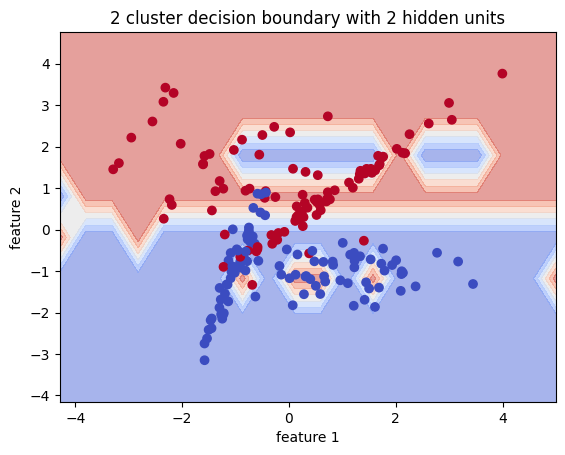

Accuracy :0.800000011920929


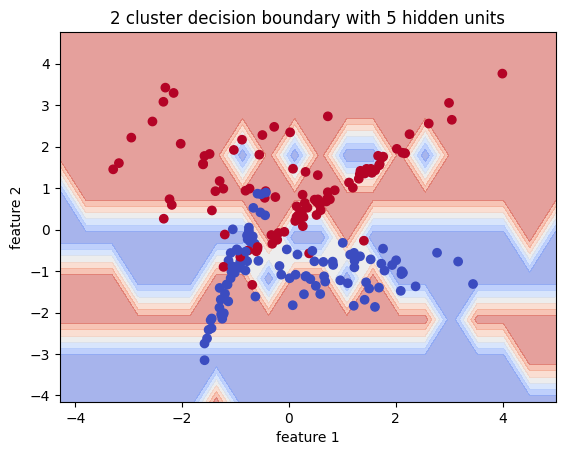

Accuracy :0.9350000023841858


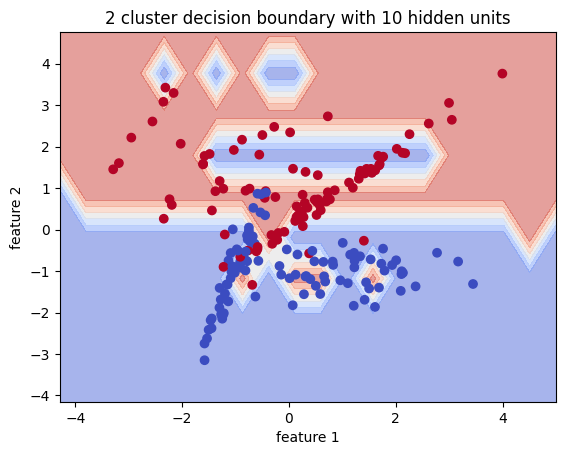

Accuracy :0.9350000023841858


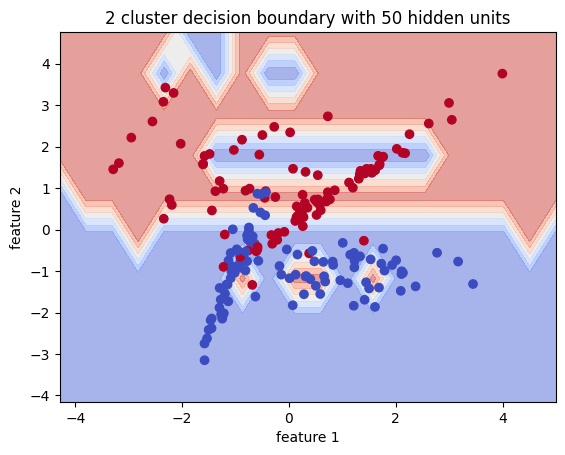

Accuracy :0.9350000023841858


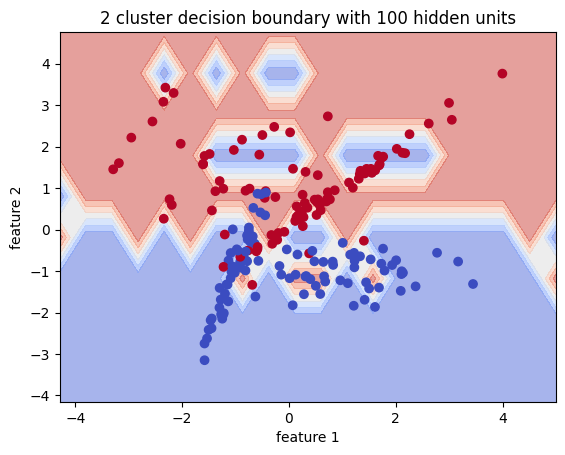

Accuracy :0.9449999928474426


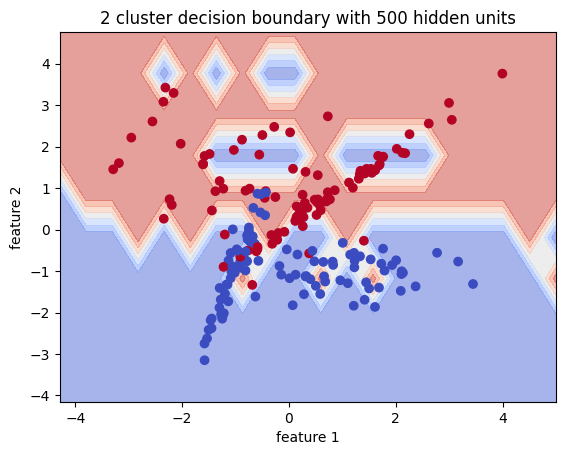

Accuracy :0.9300000071525574


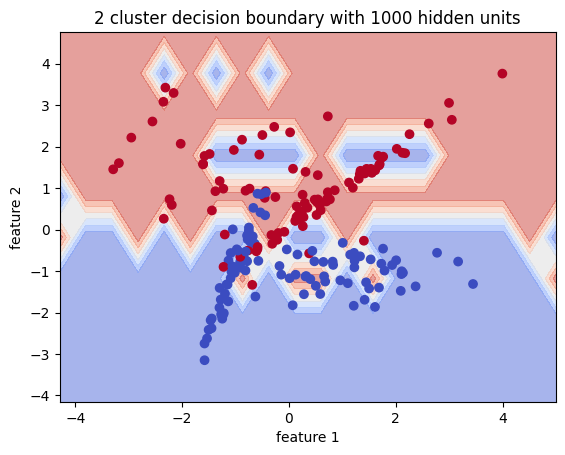

Accuracy :0.9399999976158142


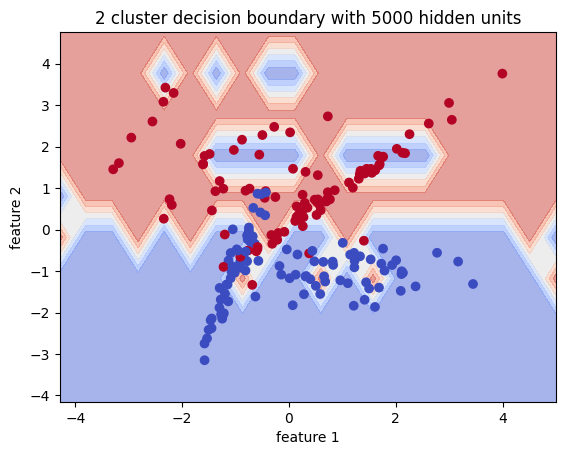

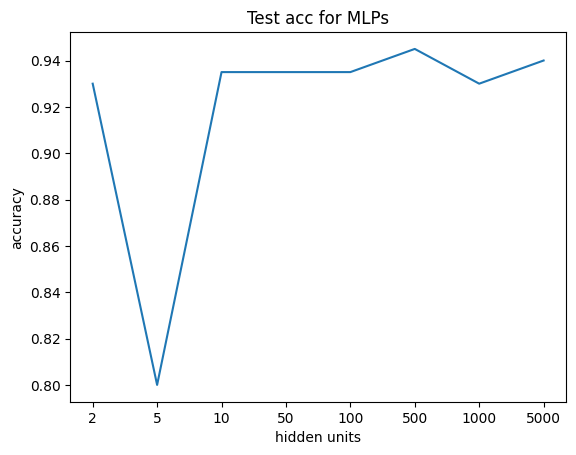

In [8]:
def train_mlp():
    epochs = 80
    loss_list, test_acc = [], []
    lossfunc = torch.nn.CrossEntropyLoss()
    hidden_unit_list = [2, 5, 10, 50, 100, 500, 1000, 5000]
    for hidden_unit in hidden_unit_list:
        mlp = build_1_layer_mlp(hidden_unit)
        optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
        for i_epoch in range(epochs):
            optimizer.zero_grad()
            outputs = mlp(train_input)
            loss = lossfunc(outputs, train_label)
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            test_outputs = mlp(test_input)
            acc = AccuarcyCompute(test_outputs, test_label)
            test_acc.append(acc)
            print('Accuracy :{}'.format(acc))
            predicted_label = np.argmax(test_outputs.cpu().data.numpy(), 1)
        plot_decision_boundary(test_input, test_label, predicted_label, layer_num=hidden_unit)
    plot_fig(test_acc, 'Test acc for MLPs', '2_cluster_test_acc.png', [str(i) for i in hidden_unit_list], x_label='hidden units')


train_mlp()

## Problem 3 : Wine

In [9]:
setup_seed(3211)
data_list, label_list = load_data('wine')
train_data = data_list[0]
train_label = label_list[0]
valid_data = data_list[1]
valid_label = label_list[1]
test_data = data_list[2]
test_label = label_list[2]
train_input = torch.tensor(train_data)
train_label = torch.tensor(train_label)
valid_input = torch.tensor(valid_data)
valid_label = torch.tensor(valid_label)
test_input = torch.tensor(test_data)
test_label = torch.tensor(test_label)

In [10]:
test_input.shape

torch.Size([36, 13])

In [11]:
def build_mlp():
    # Your code here
    mlp = nn.Sequential(
        nn.Linear(13,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )
    return mlp


Epoch [10/100], Loss: 1.8330, Validation Accuracy: 0.3333
Epoch [20/100], Loss: 0.9223, Validation Accuracy: 0.6111
Epoch [30/100], Loss: 0.7872, Validation Accuracy: 0.6667
Epoch [40/100], Loss: 0.6684, Validation Accuracy: 0.6111
Epoch [50/100], Loss: 0.6444, Validation Accuracy: 0.7222
Epoch [60/100], Loss: 0.6308, Validation Accuracy: 0.7222
Epoch [70/100], Loss: 0.6222, Validation Accuracy: 0.7778
Epoch [80/100], Loss: 0.6141, Validation Accuracy: 0.7222
Epoch [90/100], Loss: 0.6059, Validation Accuracy: 0.7778
Epoch [100/100], Loss: 0.5978, Validation Accuracy: 0.7222


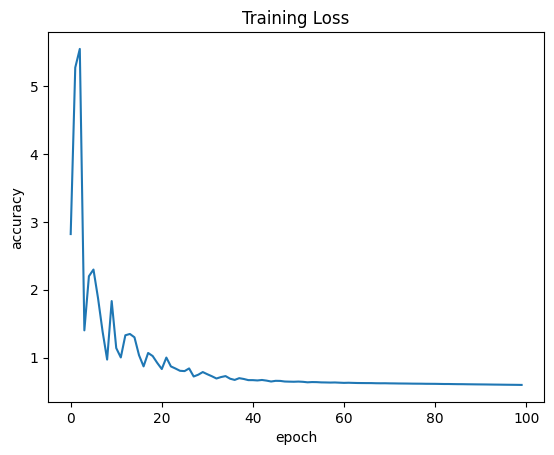

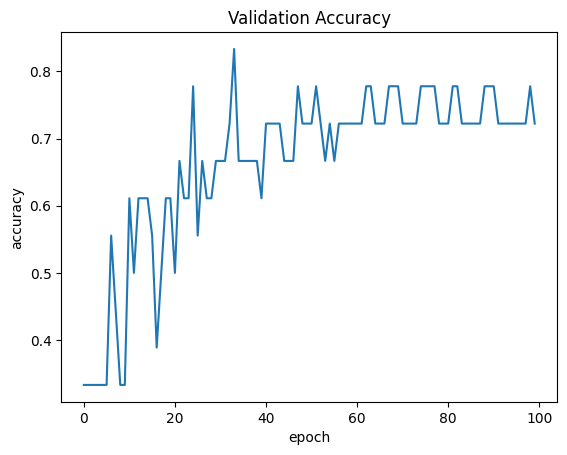

Testing Accuracy: 0.6944


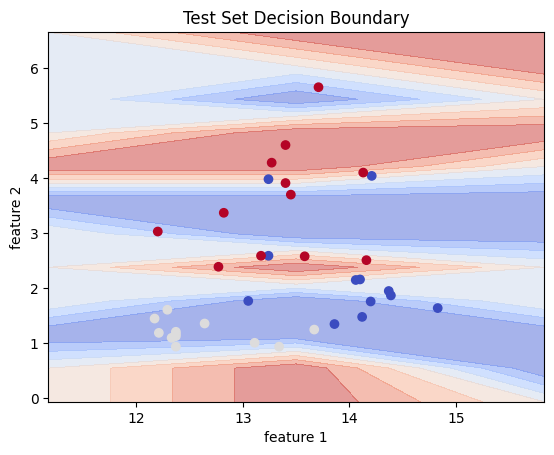

In [12]:
def train_mlp():

    mlp = build_mlp()
    mlp.train()
    optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
    lossfunc = nn.CrossEntropyLoss()
    num_epochs = 100
    train_loss = []
    val_accuracy = []

    for epoch in range(num_epochs):

        outputs = mlp(train_input.float())
        loss = lossfunc(outputs, train_label)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append training loss
        train_loss.append(loss.item())

        # Validation step
        mlp.eval()  # Set model to evaluation mode
        with torch.no_grad():
            val_outputs = mlp(valid_input.float())
            acc = AccuarcyCompute(val_outputs, valid_label)
            val_accuracy.append(acc)

        mlp.train()  # Set model back to training mode

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {acc:.4f}')

    # Plot the training loss and validation accuracy curves
    plot_fig(train_loss, title='Training Loss', dir='training_loss.png')
    plot_fig(val_accuracy, title='Validation Accuracy', dir='validation_accuracy.png')

    # Evaluate on the test set
    mlp.eval()  # Set to evaluation mode for testing
    with torch.no_grad():
        test_outputs = mlp(test_input.float())
        test_acc = AccuarcyCompute(test_outputs, test_label)
        print(f'Testing Accuracy: {test_acc:.4f}')
        predicted_label = np.argmax(test_outputs.cpu().data.numpy(), 1)

    plot_decision_boundary(test_input, test_label, predicted_label, title='Test Set Decision Boundary')


    # Plot decision boundary for the test set


train_mlp()
